# Softmax Regression Demo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M = 20
N = 2
K = 3

X = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.6, 0.2],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5, 1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-0.7],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5],
              [-1.6,-0.7],
              [-0.5,-1.4],
              [-1.0,-1.4]])

y = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0,
              0, 2, 2, 2, 1, 0, 1, 2, 2, 2])
Y = np.eye(3)[y]

def plot(X, Y, W=None, b=None):
    plt.grid()
    plt.xlim([-2.0, 2.0])
    plt.ylim([-2.0, 2.0])
    plt.scatter(X[:, 0], X[:, 1], s=50, c=np.array(['r', 'g', 'b'])[y])
    if all((W is not None, b is not None)):
        xs = np.array([-2.0, 2.0])
        ys1 = ((b[1] - b[0]) - (W[0, 0] - W[1, 0]) * xs) / (W[0, 1] - W[1, 1])
        ys2 = ((b[2] - b[0]) - (W[0, 0] - W[2, 0]) * xs) / (W[0, 1] - W[2, 1])
        ys3 = ((b[2] - b[1]) - (W[1, 0] - W[2, 0]) * xs) / (W[1, 1] - W[2, 1])
        plt.plot(xs, ys1, c='black')
        plt.plot(xs, ys2, c='black')
        plt.plot(xs, ys3, c='black')

In [2]:
def f(X, W, b) -> np.ndarray:
    return X.dot(W.T) + b

In [3]:
def softmax(Z) -> np.ndarray:
    Z -= np.expand_dims(np.max(Z, axis=1), axis=1)
    Z_exp = np.exp(Z)
    part = np.expand_dims(np.sum(Z_exp, axis=1), axis=1)
    return Z_exp / part

In [4]:
def cross_entropy_loss(X, Y, W, b, wt_decay=0.0) -> float:
    Py = softmax(f(X, W, b))
    ce_losses = -np.sum(Y * np.log(Py), axis=1) \
                + wt_decay * np.linalg.norm(W, ord='fro') ** 2
    return np.sum(ce_losses)

In [5]:
def ce_grads(X, Y, W, b, wt_decay=0.0) -> np.ndarray:
    Z = f(X, W, b)
    sigma = softmax(Z)
    W_grad = (sigma - Y).T.dot(X)
    W_grad += wt_decay * 2 * W_grad
    b_grad = np.sum(sigma - Y, axis=0)
    return W_grad, b_grad

In [6]:
def predict(X, W, b) -> np.ndarray:
    Py = softmax(f(X, W, b))
    Y_hat = np.argmax(Py, axis=1)
    return Y_hat

In [7]:
def initialize():
    W = 2.0 * np.random.random(size=(K, N))
    b = 2.0 * np.random.random(size=(K,))
    lr = 3.0
    return W, b, lr

In [ ]:
import time
from tqdm import tqdm

W, b, lr = initialize()
batch_size = 2
lr_decay = 0.9999
wt_decay = 4.0
epochs = 20

bar = tqdm(total=epochs)
for epoch in range(epochs):
    ce_loss = 0
    Y_hat = []
    for i in range(0, M, batch_size):
        # Get batch
        X_batch = X[i: i + batch_size]
        Y_batch = Y[i: i + batch_size]
        # Cache predictions
        Y_hat_batch = predict(X_batch, W, b)
        Y_hat.extend(Y_hat_batch.tolist())
        # Compute cross entropy loss
        ce_loss += cross_entropy_loss(
            X_batch, Y_batch, W, b)
        # Compute gradients
        W_grad, b_grad = ce_grads(
            X_batch, Y_batch, W, b, wt_decay=wt_decay)
        # Update
        W -= lr * W_grad
        b -= lr * b_grad
    acc = np.mean(Y_hat == y)
    lr *= lr_decay
    bar.update(1)
    bar.set_description("Epoch: %s, CE-loss: %.8f, Acc: %.2f, lr: %.4f"
                        % (epoch + 1, ce_loss / M, acc, lr))
bar.close()
tqdm._instances.clear()

Y_hat = predict(X, W, b)
tr_acc = np.mean(Y_hat == y)
tr_acc, y, Y_hat

Epoch: 20, CE-loss: 0.00000065, Acc: 1.00, lr: 2.9940: 100%|████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1088.74it/s]


(np.float64(1.0),
 array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2]),
 array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2]))

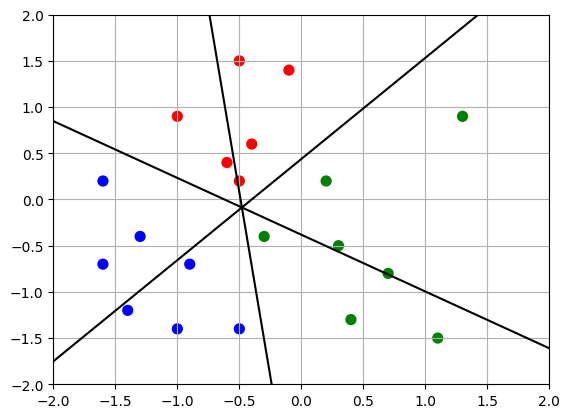

In [9]:
plot(X, Y, W, b)